# Introdction

The Pima are a group of Native Americans living in Arizona.
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

# Imports and Configuration

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the Dataset

In [5]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

# Inspect the dataset

In [22]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")
diabetes.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [23]:
diabetes.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [25]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


We can observe that the data set contain 768 rows and 9 columns. ‘class’ is the column which we are going to predict , which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non diabetic) and 268 as 1 (diabetic)

In [27]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

# Visualization

Visualising the data is an important step of the data analysis. With a graphical visualisation of the data we have a better understanding of the various features values distribution: for example we can understand what's the average age of the people or the average BMI etc...

We could of course limit our inspection to the table visualisation, but we could miss important things that may affect our model precision.

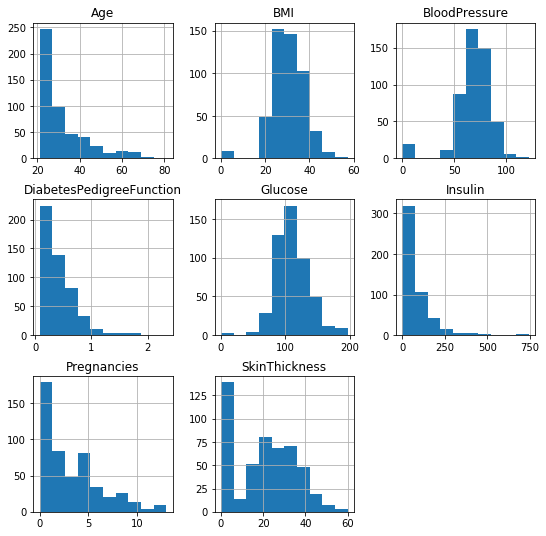

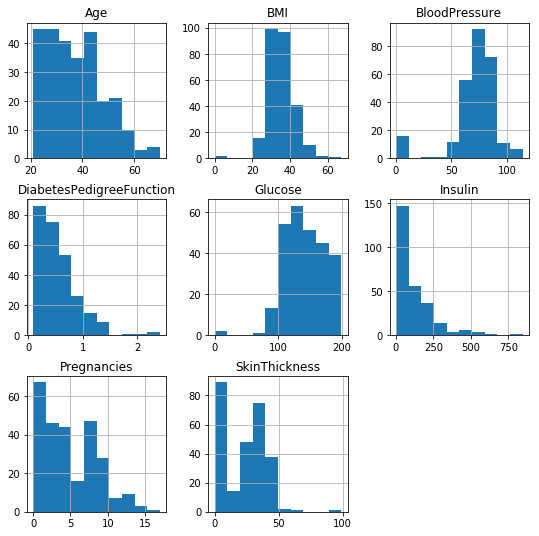

In [28]:
diabetes.groupby('Outcome').hist(figsize=(9, 9));

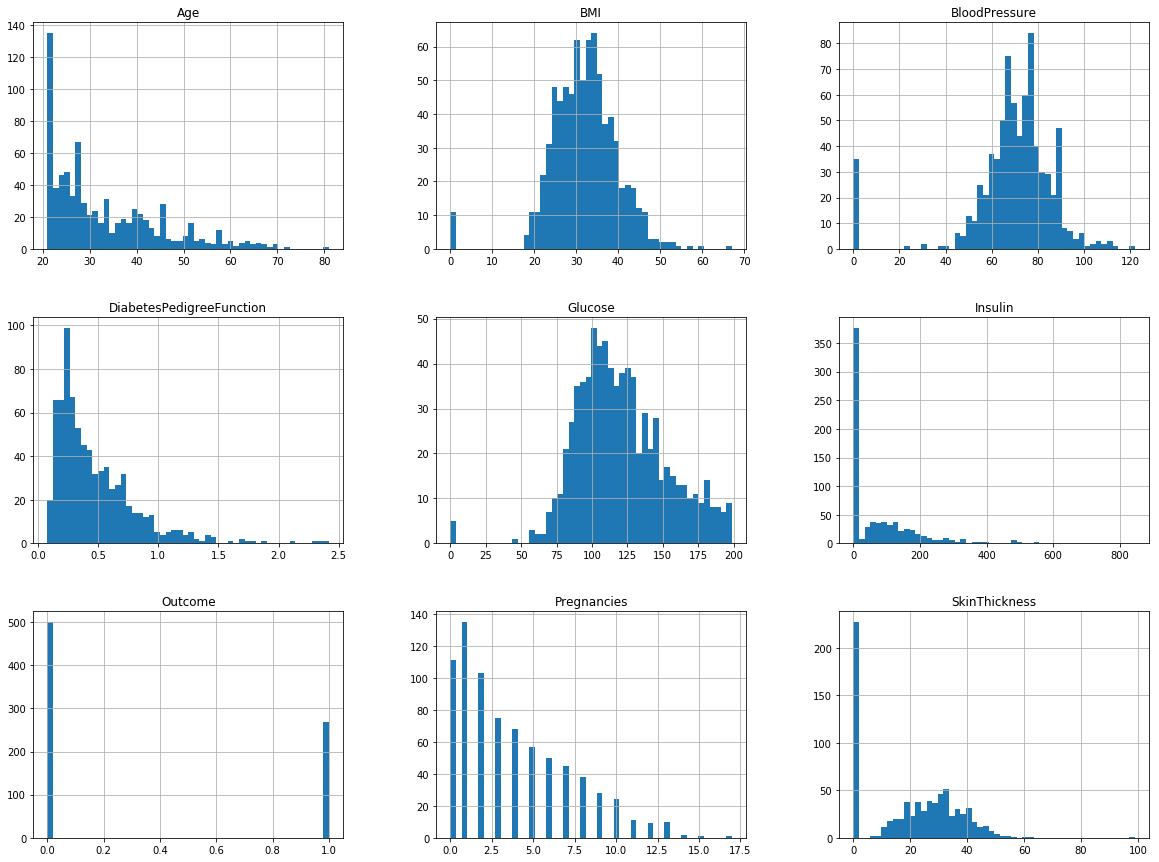

In [29]:
diabetes.hist(bins=50, figsize=(20, 15));

# Data Cleaning

In [30]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Unexpected Outliers

When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyse those outliers and determine what we can do about them.

In [31]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


In [32]:
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


Blood pressure : By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seems wrong because a living person cannot have diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.

In [33]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


Plasma glucose levels : Even after fasting glucose level would not be as low as zero. Therefor zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.

In [34]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


Skin Fold Thickness : For normal people skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0 : 227.

In [35]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


BMI : Should not be 0 or close to zero unless the person is really underweight which could be life threatening.

In [36]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])

print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


Insulin : In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

In [37]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [40]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

# Model Selection


Model selection or algorithm selection phase is the most exciting and the heart of machine learning. It is the phase where we select the model which performs best for the data set at hand.

First we will be calculating the “Classification Accuracy (Testing Accuracy)” of a given set of classification models with their default parameters to determine which model performs better with the diabetes data set.

We will import the necessary libraries to the notebook. We import 7 classifiers namely
K-Nearest Neighbors,

Support Vector Classifier, 

Logistic Regression, 

Gaussian Naive Bayes, 

Random Forest and Gradient Boost to be contenders for the best classifier.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# Evaluation Methods

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

We will import “train_test_split” for train/test split and “cross_val_score” for k-fold cross validation. “accuracy_score” is to evaluate the accuracy of the model in the train/test split method.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

Then we fit each model in a loop and calculate the accuracy of the respective model using the “accuracy_score”

In [43]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.740331
4  GNB  0.734807
5   RF  0.729282
6   GB  0.773481


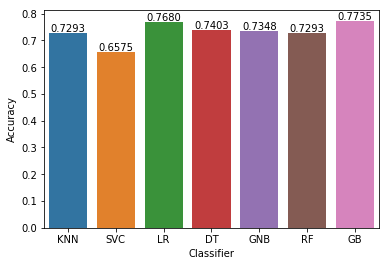

In [56]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

# K-Fold Cross Validation

In [52]:
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\sklearn\

  Name     Score
0  KNN  0.711521
1  SVC  0.656075
2   LR  0.776440
3   DT  0.693847
4  GNB  0.755681
5   RF  0.744760
6   GB  0.765442


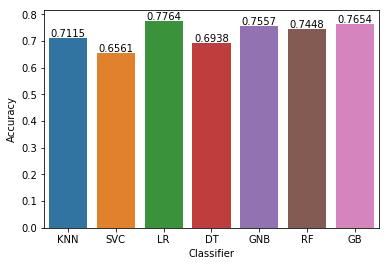

In [53]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

# At the baseline Logistic Regression managed to achieve a classification accuracy of 77.64 %. This will be selected as the prime candidate for the next phases.